# Resource Task Networks

http://egon.cheme.cmu.edu/ewo/docs/CMU_EWO_Sep_08.pdf

https://www.sciencedirect.com/science/article/pii/S0098135411000123

https://pubs.acs.org/doi/pdf/10.1021/ie401044q

https://pubs.acs.org/doi/10.1021/ie401044q

**Tasks**

* A **Task** models the execution of a discrete operation that a is component of a larger process. The task is allocated and releases one or more unit resources while performing the operation. A continuous variable determines the extent of task. The amount of state resources consumed or produced by the task scales in proportion to the extent, and may be subject to bounds imposed by the size of the unit resources assigned to the task. The bounds may be task dependent.

**Resources**

* A **State Resource** models the consumption and production of homogeneous, undifferentiated bulk goods. The goods can represent material or energy resources. The resources may be characterized by thermodynamic state. The amount of material consumed or produced scales with the size of the task. 
* A **Unit Resource** models the allocation and release of discrete resources used to perform process tasks. An known integer number of unit resources are allocated or released for each instance of a task. The unit resource will have a minimum and maximum capacity that may depend on the task being performed.

**Arcs**

* The relationship between a task and resource are is characterized by a directed **Arc**. An arc drawn from a resource to task indicates consumption or allocation of a resource. An arc drawn from a task to a resource indicates the production or release of resource. Each arc is labeled by a positive parameter $a_{k, r, \theta}$ that denotes the amount of resource $r$ consumed or produced by task $k$ at time $\theta$ relative to the start of the task.


![Screen%20Shot%202017-09-16%20at%209.45.36%20PM.png](https://jckantor.github.io/CBE30338/figures/Kondili_1993.png)

In [142]:
class State():
    def __init__(self, name):
        self.name = name
        
class Unit():
    def __init__(self, name):
        self.name = name
    
class Task():
    def __init__(self, name):
        self.name = name

class RTN():
    def __init__(self, name=""):
        self.name = name
        self.states = {}
        self.units = {}
        self.tasks = {}
        
    def add_state(self, name):
        pass
        
    def add_unit(self, name):
        self.units[name] = Unit(name)

    def add_task(self, name):
        self.tasks[name] = Task(name)
        

In [143]:
rtn = RTN("Kondili")

rtn.add_state('feed A', capacity=500, initial=500)
rtn.add_state('feed B', capacity=500, initial=500)
rtn.add_state('feed C', capacity=500, initial=500)
rtn.add_state('hot A', capacity=100)
rtn.add_state('int AB', capacity=200)
rtn.add_state('int BC', capacity=150)
rtn.add_state('impure E', capacity=100)
rtn.add_state('product 1', capacity=500)
rtn.add_state('product 2', capacity=500)

rtn.add_task('heating')
rtn.aad_task('reaction 1')
rtn.add_task('reaction 2')
rtn.add_task('reaction 3')
rtn.add_task('separation')


display(rtn)


In [54]:
# STN Data Structure
stn = {
    # states
    'states': {
        'feed A'   : {'capacity': 500, 'initial': 500, 'price':   0},
        'feed B'   : {'capacity': 500, 'initial': 500, 'price':   0},
        'feed C'   : {'capacity': 500, 'initial': 500, 'price':   0},
        'hot A'    : {'capacity': 100, 'initial':   0, 'price': -10},
        'int AB'   : {'capacity': 200, 'initial':   0, 'price': -10},
        'int BC'   : {'capacity': 150, 'initial':   0, 'price': -10},
        'impure E' : {'capacity': 100, 'initial':   0, 'price': -10},
        'product 1': {'capacity': 500, 'initial':   0, 'price':  10},
        'product 2': {'capacity': 500, 'initial':   0, 'price':  1000},
    },
    
    # state to task arcs indexed by (state, task)
    'sta': {
        ('feed A',   'heating')   : {'rho': 1.0},
        ('feed B',   'reaction 1'): {'rho': 0.5},
        ('feed C',   'reaction 1'): {'rho': 0.5},
        ('feed C',   'reaction 3'): {'rho': 0.2},
        ('hot A',    'reaction 2'): {'rho': 0.4},
        ('int AB',   'reaction 3'): {'rho': 0.8},
        ('int BC',   'reaction 2'): {'rho': 0.6},
        ('impure E', 'separation'): {'rho': 1.0},
    },
    
    # task to state arcs indexed by (task, state)
    'tsa': {
        ('heating',    'hot A')    : {'dur': 1, 'rho': 1.0},
        ('reaction 2', 'product 1'): {'dur': 2, 'rho': 0.4},
        ('reaction 2', 'int AB')   : {'dur': 2, 'rho': 0.6},
        ('reaction 1', 'int BC')   : {'dur': 2, 'rho': 1.0},
        ('reaction 3', 'impure E') : {'dur': 1, 'rho': 1.0},
        ('separation', 'int AB')   : {'dur': 2, 'rho': 0.1},
        ('separation', 'product 2'): {'dur': 1, 'rho': 0.9},
    },
    
    # unit data indexed by (unit, task)
    'units': {
        ('heater',    'heating')   : {'Vmin': 0, 'Vmax': 100},
        ('reactor 1', 'reaction 1'): {'Vmin': 0, 'Vmax':  80},
        ('reactor 1', 'reaction 2'): {'Vmin': 0, 'Vmax':  80},
        ('reactor 1', 'reaction 3'): {'Vmin': 0, 'Vmax':  80},
        ('reactor 2', 'reaction 1'): {'Vmin': 0, 'Vmax':  80},
        ('reactor 2', 'reaction 2'): {'Vmin': 0, 'Vmax':  80},
        ('reactor 2', 'reaction 3'): {'Vmin': 0, 'Vmax':  80},
        ('still',     'separation'): {'Vmin': 0, 'Vmax': 200},
    },
}

> "Consider, for instance, an exothermic batch reactor reaction task $k$ with a duration of 5 hours converting raw material $A$ to material $B$. The reaction can be carried out in 10$te$ glass-lined reactor vessels. It uses 0.25 kg/s of steam per tonne of material being processed during the first hour of its operation. After this initial period, the reaction reaches normal operating temperature, and is kept there for the rest of the processing time by external cooling requiring 2 kg/s of cooling water per tonne of material being processed."

In [147]:
rtn = RTN("Pantelides 1994")

# resources
rtn.add_resource("A")
rtn.add_resource("B")
rtn.add_resource("steam")
rtn.add_resource("cooling water")

# units
rtn.add_unit("10te glass-lined reactor")

# tasks
rtn.add_task("reaction task k")

# task inputs
rtn.task["reaction task k"].input("10te glass-lined reactor"], 0, Vmax=10000)
rtn.task["reaction task k"].input("A", 0, 1.0)
rtn.task["reaction task k"].input("steam", 0, 900.0)
rtn.task["reaction task k"].input("cooling water", [1, 2, 3, 4], 5600.0)

# task outputs
rtn.task["reaction task k"].output("B", 5, 1.0)
rtn.task["reaction task k"].release( "10te glass-lined reactor", 5)

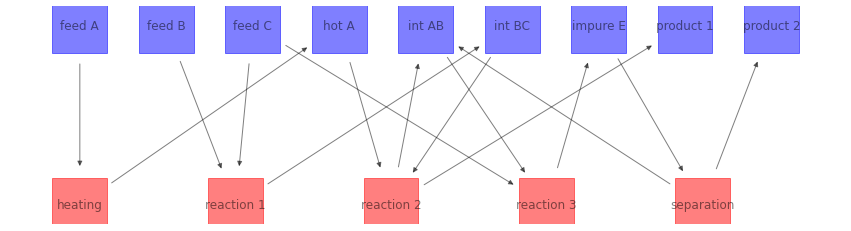

In [95]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

states = list(stn['states'].keys())
tasks = sorted(list(set(t for s, t in stn['sta'].keys())))
sta = stn['sta']
tsa = stn['tsa']

dg = nx.DiGraph()

for s in states:
    dg.add_node(s, node_color='b', node_shape='o', bipartite=0)
    
for t in tasks:
    dg.add_node(t, node_color='r', node_shape='s', bipartite=1)
    
for s, t in sta.keys():
    dg.add_edge(s, t)
    
for t, s in tsa.keys():
    dg.add_edge(t, s)


pos = {}
for k, s in enumerate(states):
    pos[s] = [k/len(states), 1]
    
for k, t in enumerate(tasks):
    pos[t] = [k/len(tasks), -1]
    
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
nx.draw(dg, pos,
        with_labels=True,
        node_color=[dg.nodes[node]["node_color"] for node in dg.nodes()],
        alpha=0.5,
        node_shape='s',
        node_size=3000)

{'reaction 3': array([-0.58333333, -1.        ]),
 'separation': array([-0.29166667, -1.        ]),
 'heating': array([ 0., -1.]),
 'reaction 2': array([ 0.29166667, -1.        ]),
 'reaction 1': array([ 0.58333333, -1.        ]),
 'product 2': array([-0.58333333,  0.55555556]),
 'product 1': array([-0.4375    ,  0.55555556]),
 'feed B': array([-0.29166667,  0.55555556]),
 'feed C': array([-0.14583333,  0.55555556]),
 'int BC': array([0.        , 0.55555556]),
 'impure E': array([0.14583333, 0.55555556]),
 'hot A': array([0.29166667, 0.55555556]),
 'int AB': array([0.4375    , 0.55555556]),
 'feed A': array([0.58333333, 0.55555556])}